Epoch 0: MSE=0.4868, MAPE=635.94%
Epoch 5: MSE=0.0205, MAPE=104.08%
Epoch 10: MSE=0.0013, MAPE=8.71%
Epoch 15: MSE=0.0011, MAPE=9.78%
Epoch 20: MSE=0.0011, MAPE=10.95%
Epoch 25: MSE=0.0010, MAPE=11.61%
Epoch 30: MSE=0.0010, MAPE=11.96%
Epoch 35: MSE=0.0010, MAPE=12.12%
Epoch 40: MSE=0.0010, MAPE=12.18%
Epoch 45: MSE=0.0009, MAPE=12.19%
Epoch 49: MSE=0.0009, MAPE=12.17%


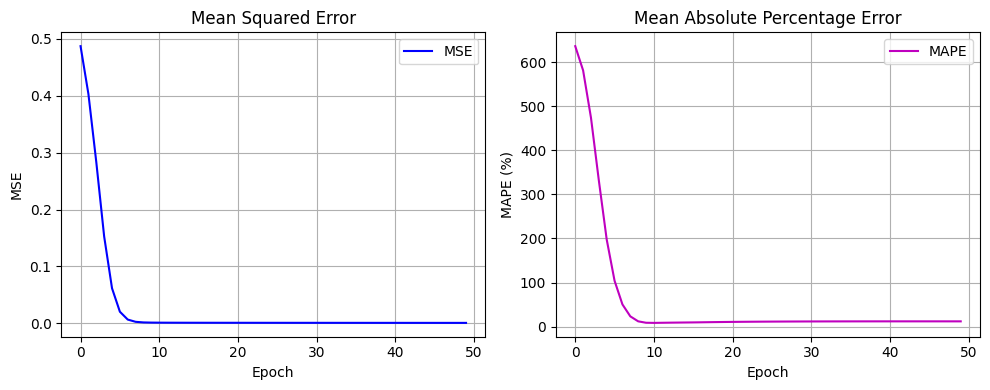

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#데이터 생성
np.random.seed(0)
samples = 1000

x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)

input = np.column_stack((x1, x2))
y = 2 * x1 + 3 * x2 - 1

#시그모이드 함수
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Sigmoid_derivative(x):
    s = Sigmoid(x)
    return s * (1 - s)

#네트워크 구조
input_layer_size = 2
hidden_layer_size = 3
output_layer_size = 1

#가중치 초기화
W1 = np.random.rand(input_layer_size, hidden_layer_size)
b1 = np.random.rand(hidden_layer_size)
W2 = np.random.rand(hidden_layer_size, output_layer_size)
b2 = np.random.rand(output_layer_size)

#학습 설정
alpha = 0.01
epochs = 50

MSE_list, MAPE_list = [], []

#학습 반복
for epoch in range(epochs):
    MSE, MAPE = 0, 0
    for i in range(samples):
        X = input[i].reshape(-1, 1)
        Y=y[i]

        #Feedforward
        Z1 = W1.T @ X + b1.reshape(-1, 1)
        A1 = Sigmoid(Z1)
        Z2 = W2.T @ A1 + b2.reshape(-1, 1)
        y_pred = Z2[0][0]

        #손실 계산
        error = y_pred - Y
        MSE += 0.5 * error ** 2
        MAPE += np.abs(error / Y) * 100
        #Backpropagation
        dJ_dy = error

        #출력층-->은닉층
        dJdW2 = dJ_dy * A1
        dJdb2 = dJ_dy

        #은닉층-->입력층
        dZ1 = (W2 * dJ_dy) * Sigmoid_derivative(Z1)
        dJdW1 = X @ dZ1.T
        dJdb1 = dZ1.T.reshape(-1)

        #가중치 업데이트
        W2 -= alpha * dJdW2
        b2 -= alpha * dJdb2
        W1 -= alpha * dJdW1
        b1 -= alpha * dJdb1

    MSE /= samples
    MAPE /= samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(MAPE)

    if epoch % 5 == 0 or epoch == epochs - 1:
        print("Epoch {}: MSE={:.4f}, MAPE={:.2f}%".format(epoch, MSE, MAPE))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(MSE_list, label='MSE', color='b')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(MAPE_list, label='MAPE', color='m')
plt.xlabel('Epoch')
plt.ylabel('MAPE (%)')
plt.title('Mean Absolute Percentage Error')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()